Задача 1

Объясняемая переменная y зависит от двух категориальных факторов A и B, причём фактор A имеет 3 уровня, а фактор B - 4 уровня. Результаты наблюдений приведены в таблице:

С помощью двухфакторного дисперсионного анализа проверьте влияние каждого из факторов на переменную y.

In [1]:
import numpy as np

m = 3
k = 4

y = [[2.68, 3.29, 2.88, 4.45],
     [4.12, 4.96, 5.09, 5.22],
     [5.52, 4.50, 5.42, 5.29]]

y = np.array(y)

ssa = k * ((y[0, :].mean() - y.mean())**2 + (y[1, :].mean() - y.mean())**2 + (y[2, :].mean() - y.mean())**2).sum()
ssb = m * ((y[:, 0].mean() - y.mean())**2 + (y[:, 1].mean() - y.mean())**2 + (y[:, 2].mean() - y.mean())**2 + (y[:, 3].mean() - y.mean())**2).sum()

ssw = 0

for i in range(3):
    for j in range(4):
        ssw += (y[i, j] - y[i, :].mean() - y[:, j].mean() + y.mean())**2
        
Fa = ssa**2*(k-1)/ssw**2
Fb = ssb**2*(m-1)/ssw**2


In [2]:
from scipy import stats

n = k*m

k1a = m - 1
k2a = n - m

alpha = 0.05

ta = stats.f.ppf(1 - alpha, k1a, k2a)
print(f'Статистика Fa = {Fa} попала в критическую область ({ta}, +∞). Результат - не случайность при уровне значимости в 0.05.')

k1b = k - 1
k2b = n - k

alpha = 0.05

tb = stats.f.ppf(1 - alpha, k1b, k2b)
print(f'Статистика Fb = {Fb} не попала в критическую область ({tb}, +∞). Результат - случайность при уровне значимости в 0.05.')

Статистика Fa = 49.51886301953694 попала в критическую область (4.25649472909375, +∞). Результат - не случайность при уровне значимости в 0.05.
Статистика Fb = 0.9615863719464893 не попала в критическую область (4.06618055135116, +∞). Результат - случайность при уровне значимости в 0.05.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
plt.style.use('bmh')

In [4]:
SP = pd.read_csv('SnP500.csv').dropna()
RU = pd.read_csv('RUT.csv').dropna()
TR = pd.read_csv('TREAST.csv')
VI = pd.read_csv('VIX.csv')

In [5]:
SP = SP[SP.Date > '2000-12-31']
SP['mid'] = (SP.Open + SP.Close)/2

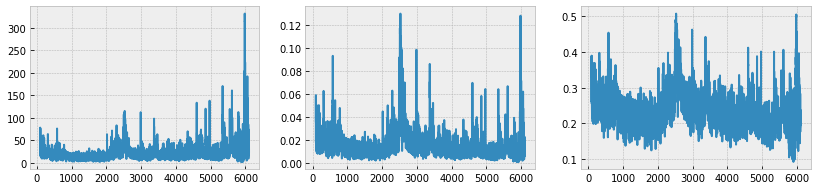

In [6]:
d = SP.High - SP.Low
p = ((SP.High - SP.Low)/SP.mid)
pm = ((SP.High - SP.Low)/SP.mid)**(1/3)

fig, ax = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(14, 3)
ax1, ax2, ax3 = ax.flatten()
ax1.plot(d)
ax2.plot(p)
ax3.plot(pm)
plt.show()

In [7]:
SP.describe()

,Open,High,Low,Close,Adj Close,Volume,mid
count,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4.980000e+03,4980.000000
mean,1638.568072,1650.103669,1626.510291,1639.306889,1639.306889,1.369870e+06,1638.937481
std,655.292954,658.520350,652.301876,656.086348,656.086348,8.482371e+05,655.615776
min,674.750000,694.750000,665.750000,676.000000,676.000000,0.000000e+00,682.375000
25%,1146.937500,1158.437500,1137.750000,1148.187500,1148.187500,7.247290e+05,1146.687500
50%,1359.875000,1370.500000,1350.375000,1359.750000,1359.750000,1.284896e+06,1359.750000
75%,2073.000000,2082.500000,2060.562500,2074.250000,2074.250000,1.844430e+06,2072.312500
max,3391.750000,3397.500000,3382.000000,3387.750000,3387.750000,6.659472e+06,3385.000000


In [8]:
pm = pm.reset_index(drop=True)
SP.reset_index(drop=True, inplace=True)

In [9]:
win = 200

for i in range(0, len(p), 500):
    arr = []
    arr.append(pm[i:i+win])
    fig, ax = plt.subplots(nrows=2, ncols=1)
    fig.set_size_inches(10, 10)
    fig.subplots_adjust(wspace=0.3)
    fig.subplots_adjust(hspace=0.3)
    ax1, ax2 = ax.flatten()
    ax1.hist(arr, bins=15)
    ax1.set_xlim([0.05, 0.55])
    ax1.set_ylim([0, 65])
    ax1.set_title('Histogram of a sliding sample of the S&P 500 index')
    ax2.plot(SP.mid, color='g')
    ax2.plot(SP.mid[i:i+win], color='r')
    ax2.set_ylim([600, 3500])
    ax2.set_xlim([0, 5000])
    plt.title(f'{SP.Date[SP.index[i]]}')
    plt.savefig('D:/Temp/hist/{:04d}.png'.format(i))
    plt.clf()
    #plt.show()

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [10]:
win = 200

for i in range(0, len(p), 500):
    arr = []
    arr.append(pm[i:i+win])
    fig, ax = plt.subplots(nrows=1, ncols=1)
    fig.set_size_inches(10, 10)
        
    samples = np.array(arr)

    loc = samples.mean()
    scale = samples.std()

    interval = np.linspace(0, 1, samples.shape[1])[1:-1]
    x = stats.norm.ppf(interval, loc=loc, scale=scale)
    y = np.quantile(samples, interval)

    ax.scatter(x, y, s=5)
    ax.plot(x, x, color='C1', linestyle='dashed')
    ax.set_xlim([0.05, 0.55])
    ax.set_ylim([0.05, 0.55])
    
    plt.title(f'{SP.Date[SP.index[i]]}')
    plt.savefig('D:/Temp/norm/{:04d}.png'.format(i))
    plt.clf()
    plt.show()

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [11]:
TRV = TR.set_index('DATE')
TRV.index = pd.to_datetime(TRV.index)
SPM = SP[['Date', 'mid']]
SPM = SPM.set_index('Date')
SPM.index = pd.to_datetime(SPM.index)
SPMTRV = SPM[SPM.index > '2002-12-17']
SPMTRV = SPMTRV.join(TRV)
SPMTRV.TREAST = SPMTRV.TREAST.fillna(method='ffill')
corr = SPMTRV.mid.rolling(window=100).mean().rolling(window=100).corr(SPMTRV.TREAST)

d:\temp\python\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


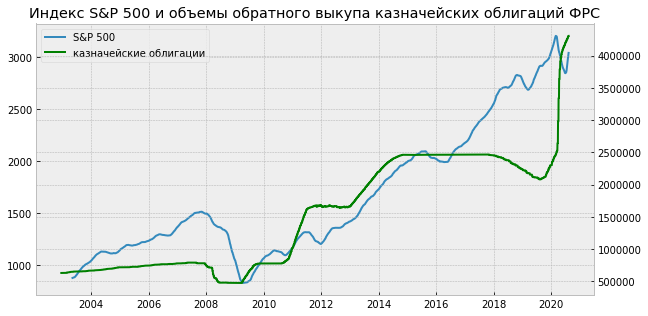

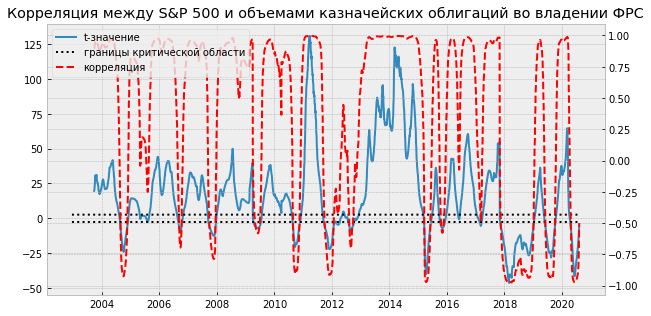

In [12]:
t = corr * (100 - 2)**(1/2) / (1 - corr ** 2)**(1/2)
t1 = stats.t.ppf(0.01 / 2, df=100 - 2)
t2 = stats.t.ppf(1 - 0.01 / 2, df=100 - 2)

corrt = pd.DataFrame({'corr': corr, 't1': np.ones(len(t))*t1, 't2': np.ones(len(t))*t2})

fig, ax = plt.subplots()
ax.set_title('Индекс S&P 500 и объемы обратного выкупа казначейских облигаций ФРС')
fig.set_size_inches(10, 5)
lns1 = ax.plot(SPMTRV.mid.rolling(window=100).mean(), label='S&P 500')
ax2 = ax.twinx()
lns2 = ax2.plot(SPMTRV.TREAST, c='g', label='казначейские облигации')

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='upper left')

fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
ax.set_title('Корреляция между S&P 500 и объемами казначейских облигаций во владении ФРС')
ax2 = ax.twinx()
lns1 = ax.plot(t, label='t-значение')
lns2 = ax.plot(corrt.t1, linestyle=':', c='k', label='границы критической области')
lns3 = ax.plot(corrt.t2, linestyle=':', c='k')
lns4 = ax2.plot(corr, linestyle='--', c='r', label='корреляция')
ax2.set_frame_on(True)

lns = lns1+lns2+lns4
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc='upper left')

plt.show()

In [17]:
RU = RU[RU.Date > '2000-12-31']
RU['midr'] = (RU.Open + RU.Close)/2
SPM = SP[['Date', 'mid']]
RUM = RU[['Date', 'midr']]
SPM = SPM.set_index('Date')
SPM.index = pd.to_datetime(SPM.index)
RUM = RUM.set_index('Date')
RUM.index = pd.to_datetime(RUM.index)
SPMRUM = SPM.join(RUM)
SPMRUM.midr = SPMRUM.midr.fillna(method='ffill')
corr = SPMRUM.mid.rolling(window=100).corr(SPMRUM.midr)

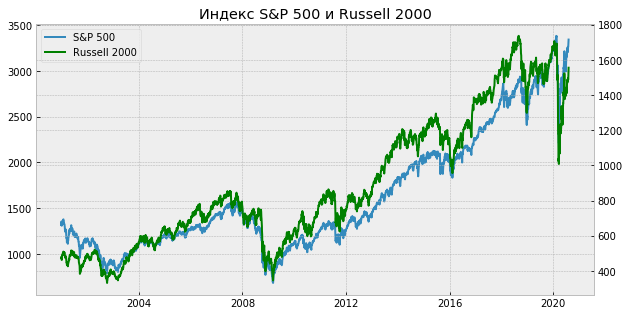

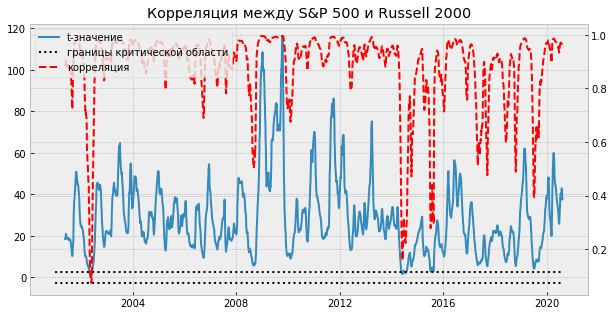

In [18]:
t = corr * (100 - 2)**(1/2) / (1 - corr ** 2)**(1/2)
t1 = stats.t.ppf(0.01 / 2, df=100 - 2)
t2 = stats.t.ppf(1 - 0.01 / 2, df=100 - 2)

corrt = pd.DataFrame({'corr': corr, 't1': np.ones(len(t))*t1, 't2': np.ones(len(t))*t2})

fig, ax = plt.subplots()
ax.set_title('Индекс S&P 500 и Russell 2000')
fig.set_size_inches(10, 5)
lns1 = ax.plot(SPMRUM.mid, label='S&P 500')
ax2 = ax.twinx()
lns2 = ax2.plot(SPMRUM.midr, c='g', label='Russell 2000')

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='upper left')

fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
ax.set_title('Корреляция между S&P 500 и Russell 2000')
ax2 = ax.twinx()
lns1 = ax.plot(t, label='t-значение')
lns2 = ax.plot(corrt.t1, linestyle=':', c='k', label='границы критической области')
lns3 = ax.plot(corrt.t2, linestyle=':', c='k')
lns4 = ax2.plot(corr, linestyle='--', c='r', label='корреляция')
ax2.set_frame_on(True)

lns = lns1+lns2+lns4
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc='upper left')

plt.show()

In [82]:
win = 10

SPM['rollm'] = SPM.mid.rolling(window=win).mean()
SPM['rollstd'] = SPM.mid.rolling(window=win).std()

alpha = 0.01

t1 = stats.t.ppf(alpha / 2, df=win - 1)
t2 = stats.t.ppf(1 - alpha / 2, df=win - 1)

SPM['t1'] = SPM.rollm + t1*SPM.rollstd/(win**(1/2))
SPM['t2'] = SPM.rollm + t2*SPM.rollstd/(win**(1/2))

In [83]:
SPM

,mid,rollm,rollstd,t1,t2
Date,,,,,
2001-01-02,1315.500,NaN,NaN,NaN,NaN
2001-01-03,1330.000,NaN,NaN,NaN,NaN
2001-01-04,1354.500,NaN,NaN,NaN,NaN
2001-01-05,1324.875,NaN,NaN,NaN,NaN
2001-01-08,1308.875,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2020-08-03,3280.250,3241.6250,24.892198,3216.043581,3267.206419
2020-08-04,3295.375,3246.4000,30.187654,3215.376503,3277.423497
2020-08-05,3308.375,3255.5375,33.900593,3220.698260,3290.376740


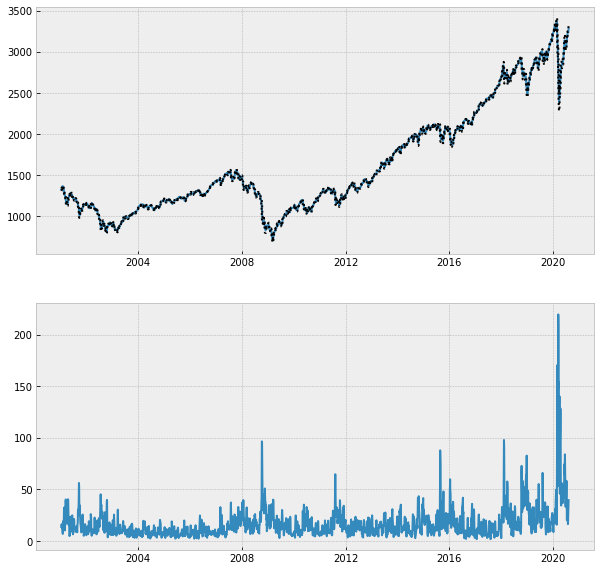

In [87]:
fig, ax = plt.subplots(nrows=2, ncols=1)
fig.set_size_inches(10, 10)
ax1, ax2 = ax.flatten()
ax1.plot(SPM.rollm)
ax1.plot(SPM.t1, linestyle=':', c='k')
ax1.plot(SPM.t2, linestyle=':', c='k')
ax2.plot(SPM.rollstd)
plt.show()

